# **1️⃣ Introduction to Naïve Bayes**

> **Naïve Bayes is a probabilistic classifier based on applying Bayes’ theorem with a strong assumption of independence among features.**

It is mostly used for:

- Spam detection (Email)

- Sentiment analysis

- Text classification

- Document categorization

- Medical diagnosis

# 2️⃣ Mathematical Foundation — Bayes’ Theorem

At its core, Naïve Bayes is based on **Bayes’ Theorem**:

$$
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
$$

Where:

- $P(A|B)$ → **Posterior probability**: Probability of hypothesis **A** (class) given the data **B** (features)  
- $P(B|A)$ → **Likelihood**: Probability of data **B** given hypothesis **A**  
- $P(A)$ → **Prior probability** of **A** before seeing the data  
- $P(B)$ → **Marginal probability** of data **B**


### 🌰 Example Intuition

Suppose we want to classify an email as **Spam** or **Not Spam**.

Let’s say our features are words like `["free", "win", "money"]`.

We want to compute:

$$
P(Spam \mid free, win, money)
$$

By Bayes' theorem:

$$
P(Spam \mid X) = \frac{P(X \mid Spam) \cdot P(Spam)}{P(X)}
$$

We ignore $P(X)$ (same for all classes) and compute for both **Spam** and **Not Spam**.

The final prediction is the class with **maximum posterior probability**.


# 3️⃣ **Why “Naïve”? — The Independence Assumption**

Naïve Bayes assumes that **all features are independent of each other given the class**.

Formally:

$$
P(X_1, X_2, ..., X_n \mid Y) = P(X_1 \mid Y) \cdot P(X_2 \mid Y) \cdot ... \cdot P(X_n \mid Y)
$$

➡️ This simplifies computation drastically.

Even though this assumption is **rarely true in real life**, Naïve Bayes performs surprisingly well in practice, especially for text classification tasks.

# 🧠 Naive Bayes: The "Naive" Assumption & Independence

## 1. Why is it called "Naive"? 🤷‍♂️
It is called "Naive" because it makes a **strong, often unrealistic assumption** about your data to simplify the math.

* **The Assumption:** It assumes all features in your dataset are **Probabilistically Independent** of each other, *given the class label*.
* **The Reality:** In real-world data, features are usually linked (e.g., "Temperature" and "Humidity" are correlated).
* **The Simplification:** Because of this assumption, the algorithm doesn't need to calculate complex relationships. It simply multiplies the individual probabilities:
  $$P(y | x_1, \dots, x_n) \propto P(y) \prod P(x_i | y)$$

> **Why do we use it?** ⚡
> Even though the assumption is technically "wrong," the algorithm is **lightning fast**, requires less training data, and is usually accurate enough for ranking predictions (e.g., Spam Filtering).

---

## 2. "Independence" vs. "Correlation" 🔗
The specific type of independence Naive Bayes assumes is **Conditional Independence**.

### The "Shoe Size" Analogy 👟 -> 📖
* **Global View (Dependent):** If you look at a whole school, Shoe Size and Reading Ability are **correlated** (Big feet = Older kid = Better reader).
* **Conditional View (Independent):** If you filter by **Class** (e.g., look *only* at 5th Graders), knowing a kid's shoe size tells you **nothing** about their reading ability.
* **The Assumption:** Naive Bayes assumes that once you know the **Class** (The Target), the features stop influencing each other.

---

## 3. The "Double Counting" Problem 🗣️
When you feed correlated features (like "Hot Temp" and "Sunny Weather") into Naive Bayes, it treats them as two totally separate, surprising coincidences.

* **The Effect:** It counts the evidence twice (or more).
* **The Consequence:** The model becomes **Overconfident**.
    * *Real probability:* 70%
    * *Naive Bayes calculation:* 99.9% (because it multiplied the evidence together unnecessarily).

---

## 4. Comparison: Naive Bayes vs. Linear Regression ⚔️
This is the source of common confusion. Both algorithms dislike correlation, but for different reasons.

| Feature | **Linear Regression** 📉 | **Naive Bayes** 🎲 |
| :--- | :--- | :--- |
| **The Concept** | **Linear Independence** (Linear Algebra) | **Conditional Independence** (Probability Theory) |
| **The Assumption** | No Multicollinearity. | Features are independent given the class. |
| **The Problem** | If features are correlated, the **Weights (Coefficients)** break. The model doesn't know which feature to credit. | If features are correlated, the **Probability Score** is wrong (Double Counting). |
| **The Result** | Unstable model interpretation. | Overconfident predictions (though accuracy often remains high). |

---

## 📝 Summary Checklist
- [ ] **Naive** = Assumes features are independent.
- [ ] **Conditional Independence** = Features don't relate to each other, they only relate to the Class.
- [ ] **Correlation** = In Naive Bayes, correlation leads to "double counting" evidence.
- [ ] **Difference** = Linear Regression fears correlation because of **Math/Weights**; Naive Bayes fears correlation because of **Probability/Overconfidence**.

# 4️⃣ Types of Naïve Bayes Classifiers

#### **There are three main types based on data distribution:**

| Type              | When to Use         | Description                                            |
| ----------------- | ------------------- | ------------------------------------------------------ |
| **GaussianNB**    | Continuous features | Assumes features follow a **normal distribution** <br> ➡️ suitable for the features that are continous and have normal distribution     |
| **MultinomialNB** | Discrete counts     | Assumes that features follow a **multinomial distribution**<br>Used for **text data** (word counts, frequencies)      |
| **BernoulliNB**   | Binary features     | Used for **binary/boolean data**,<br> 1.Assumes that features are binary(boolean) <br> 2. variables, Suitable for data that can be represented as binary features, such as document classification problems where each term is either present or absent. |

#### **🧠 Naive Bayes can be used for binary and multiclass classification.**

| Type                          | Example                                        | Explanation                                               |
| ----------------------------- | ---------------------------------------------- | --------------------------------------------------------- |
| **Binary classification**     | Spam (1) vs Ham (0)                            | Two possible classes → most common case                   |
| **Multiclass classification** | Iris dataset → Setosa / Versicolor / Virginica | More than two classes — Naive Bayes still works perfectly |


# 🎲 Multinomial Distribution — Explained in Detail

The **Multinomial Distribution** is a **generalization of the Binomial Distribution** that describes the probability of obtaining a **set of counts** for outcomes from **multiple independent trials**, where each trial can result in **more than two possible outcomes**.  

It is typically used when you have a **fixed number of trials** and want to determine the **probability of a specific combination of outcomes** — for example, the number of times you roll a “1”, “2”, “3”, etc., on a die rolled multiple times. 🎯

---

## 🌟 Key Characteristics

1️⃣ **More than two outcomes**  
   - Unlike the **Binomial Distribution**, which is limited to only two outcomes (e.g., success or failure ✅❌),  
     the **Multinomial Distribution** can handle any number of possible outcomes ($k$) for each trial.

2️⃣ **Independent trials**  
   - Each trial is **independent** of the others — meaning the outcome of one trial does not affect another.

3️⃣ **Fixed number of trials ($n$)**  
   - The experiment consists of a **fixed number of trials**, denoted by $n$.

4️⃣ **Constant probabilities**  
   - The probability of each outcome ($p_1, p_2, ..., p_k$) remains **constant** for every trial.  
   - The sum of all outcome probabilities equals **1**:  
     $$
     \sum_{i=1}^{k} p_i = 1
     $$

---

## 🎯 Example 1 — Rolling a Die

Let’s say you roll a **fair six-sided die** 🎲 **10 times** ($n = 10$).  
The **Multinomial Distribution** can be used to find the probability of getting a specific combination of outcomes — for example:

- three “1”s,  
- two “2”s,  
- one “3”,  
- and four “6”s.  

Here, we have $k = 6$ categories (the six sides of the die).

---

## ⚖️ Example 2 — Jury Selection

Imagine a city where the population is divided into three demographic groups:  
👩🏾‍⚖️ Black, 🧑🏽‍⚖️ Hispanic, and 👨🏻‍⚖️ Other.  

If we are selecting a **jury of 12 members**, the **Multinomial Distribution** can be used to calculate the probability of getting a **specific composition** —  
for instance, 5 Black, 4 Hispanic, and 3 Other jurors — based on the city’s known population proportions.

---

## 🔗 Relationship to the Binomial Distribution

The **Binomial Distribution** is actually a **special case** of the **Multinomial Distribution**, where the number of outcomes is only **two** ($k = 2$).

For example:
- Coin toss (Heads or Tails) 🪙  
- Pass/Fail test outcomes 📄

So, when $k = 2$,  
the Multinomial Distribution **reduces to the Binomial Distribution**.

---

## 🧮 Formula for Multinomial Probability

The probability of getting counts $x_1, x_2, ..., x_k$ (such that $\sum_{i=1}^{k} x_i = n$) is given by:

$$
P(X_1 = x_1, X_2 = x_2, ..., X_k = x_k) =
\frac{n!}{x_1! \, x_2! \, ... \, x_k!} \, p_1^{x_1} \, p_2^{x_2} \, ... \, p_k^{x_k}
$$

Where:
- $n$ → Total number of trials  
- $x_i$ → Count of outcome $i$  
- $p_i$ → Probability of outcome $i$

---

## 🧠 Summary

| Feature | Description |
|----------|--------------|
| **Type** | Discrete probability distribution |
| **Trials** | Fixed number ($n$) |
| **Outcomes per trial** | More than two ($k > 2$) |
| **Parameters** | $n, p_1, p_2, ..., p_k$ |
| **Special Case** | Binomial distribution ($k = 2$) |

---

✨ **In short:**  
The **Multinomial Distribution** helps you model experiments with **multiple discrete outcomes** per trial, each occurring with a fixed probability — a natural extension of the Binomial world! 🌈


# **5️⃣ Advantages**

✅ **Very fast to train**<br>
✅ **Works well on small datasets**<br>
✅ **Performs well for text classification**<br>
✅ **Handles multi-class problems naturally**<br>
✅ **Requires less training data**

# **6️⃣ Limitations**

**⚠️ Strong independence assumption — features often aren’t independent**<br>
**⚠️ Can perform poorly with highly correlated features**<br>
**⚠️ Doesn’t estimate probabilities accurately (only good for classification)**

# 7️⃣ **Implementation**

We'll use the **Iris Dataset 💮** to undersatnd Naive Bayes.

In [1]:
# Implementation

from sklearn.datasets import load_iris

In [2]:
iris = load_iris()


In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
x = iris.data
y = iris.target

In [7]:
# lets check the distribution of the data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
dfx = pd.DataFrame(data = x, columns = iris.feature_names)
dfy = pd.DataFrame(data = y, columns = ["Species"])

df = pd.concat([dfx,dfy], axis = 1)

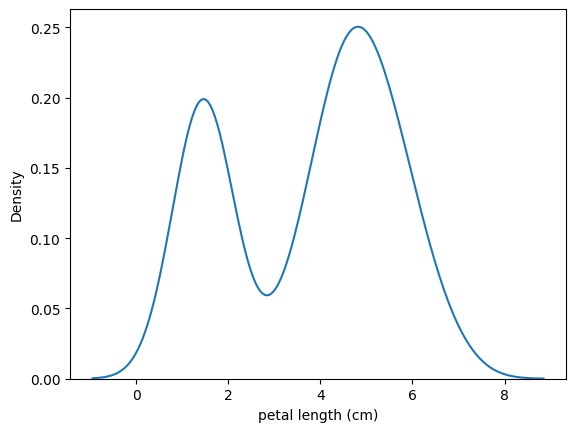

In [9]:
sns.kdeplot(
    data = df,
    x = df["petal length (cm)"],

)

plt.show()

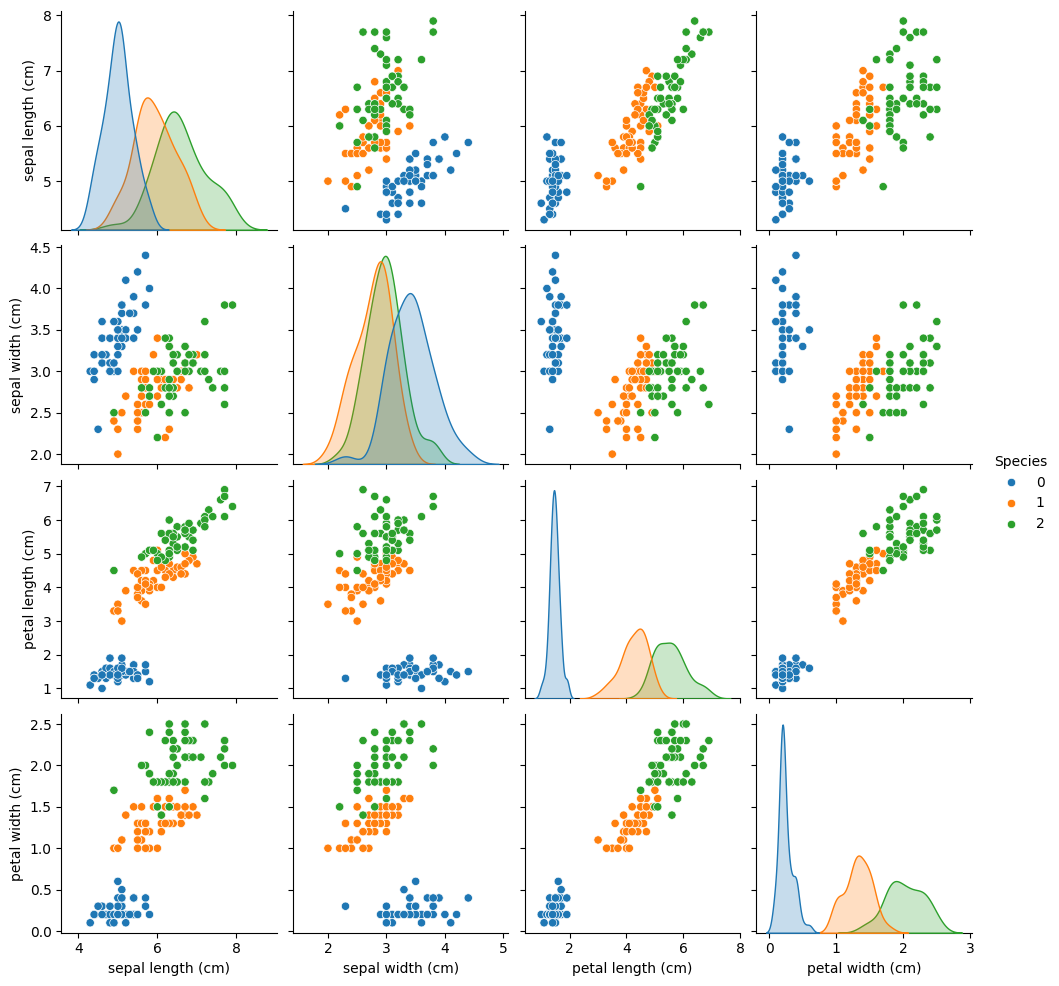

In [10]:
sns.pairplot(data = df, hue = "Species", aspect = 1, diag_kind = "kde", palette = "tab10",  )

plt.show()

### 🌟🌟 NOTE : plot interpretation 
> ##### **As we can see that most of the data distribution is almomst normal so the best naive bayes model for this type of data is `Gaussian Naive Bayes`**

In [11]:
# now its time to split the data

from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [13]:
# now importing Gaussian naive bayes classifier

from sklearn.naive_bayes import GaussianNB

In [14]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [15]:
gnb.score(x_test,y_test)

1.0

In [16]:
y_pred = gnb.predict(x_test)

In [17]:
# Now Model Evaluation 

from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, classification_report

In [18]:
acc = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test,y_pred)
m_conf_m = multilabel_confusion_matrix(y_test,y_pred)

print(f"Accuracy : {acc}\n")
print(f"Classification Report :\n{class_report}")
print(f"\nConfusion Matrices : {m_conf_m}")

Accuracy : 1.0

Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrices : [[[20  0]
  [ 0 10]]

 [[21  0]
  [ 0  9]]

 [[19  0]
  [ 0 11]]]


# 8️⃣ **Explanation Of Code**

| Code Line                 | Explanation                                                 |
| ------------------------- | ----------------------------------------------------------- |
| `GaussianNB()`            | Creates an instance assuming Gaussian (normal) distribution |
| `fit()`                   | Trains the model on training data                           |
| `predict()`               | Predicts the class labels for new samples                   |
| `accuracy_score()`        | Fraction of correct predictions                             |
| `confusion_matrix()`      | Compares actual vs predicted classes                        |
| `classification_report()` | Shows precision, recall, f1-score                           |


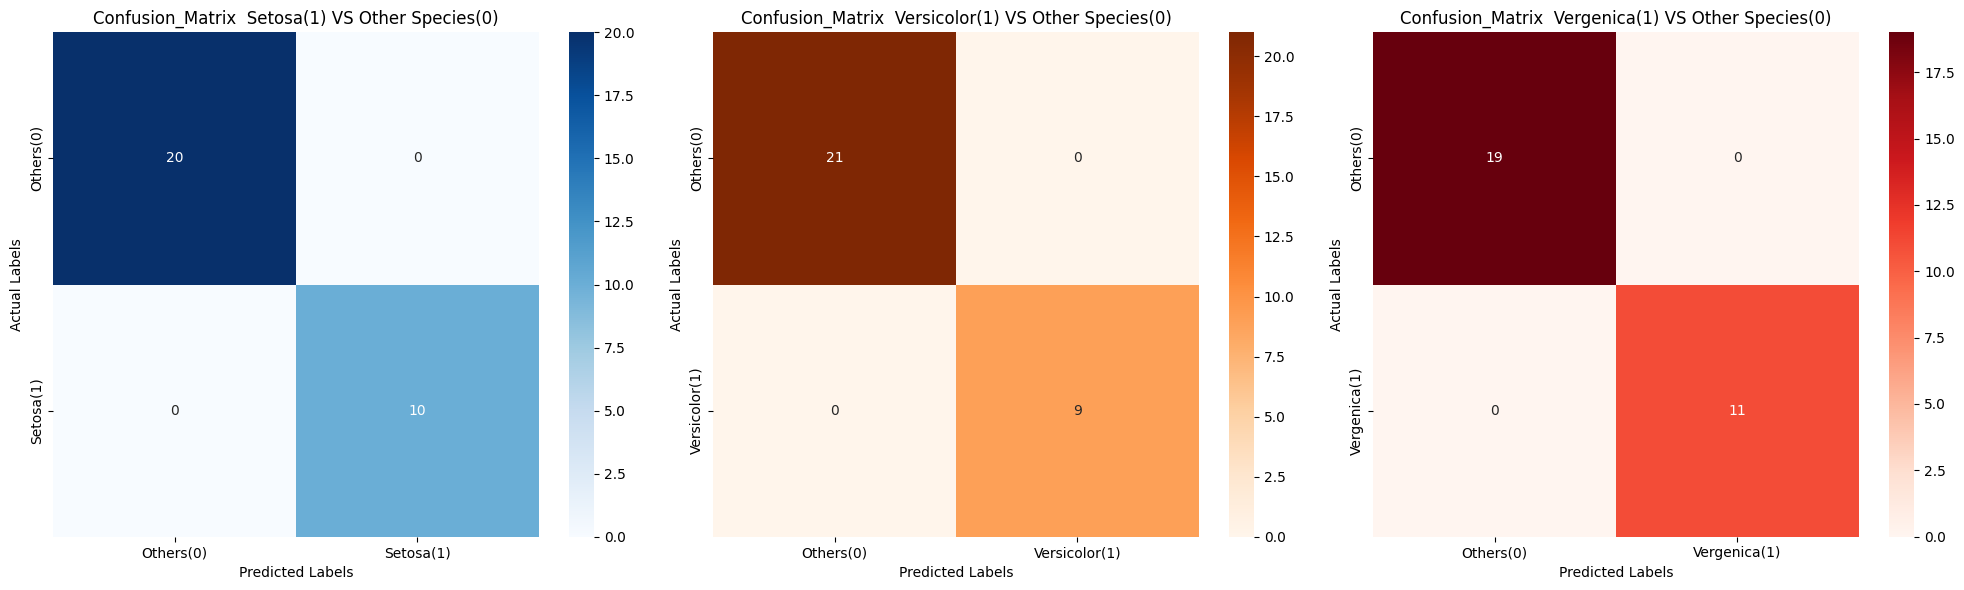

In [19]:
# plotting multilabelconfusionMatrix

fig, axes = plt.subplots(1,3, figsize= (20,6))

species = ["Setosa(1)", "Versicolor(1)", "Vergenica(1)"]

for i in range(len(m_conf_m)):
    sns.heatmap(
        m_conf_m[i],
        annot = True,
        cmap = ["Blues", "Oranges", "Reds"][i],
        xticklabels=["Others(0)", species[i]],
        yticklabels=["Others(0)", species[i]],
        ax = axes[i]
        
    )
    axes[i].set_xlabel("Predicted Labels")
    axes[i].set_ylabel("Actual Labels")
    axes[i].set_title(f"Confusion_Matrix  {species[i]} VS Other Species(0)")
plt.tight_layout()
plt.show()

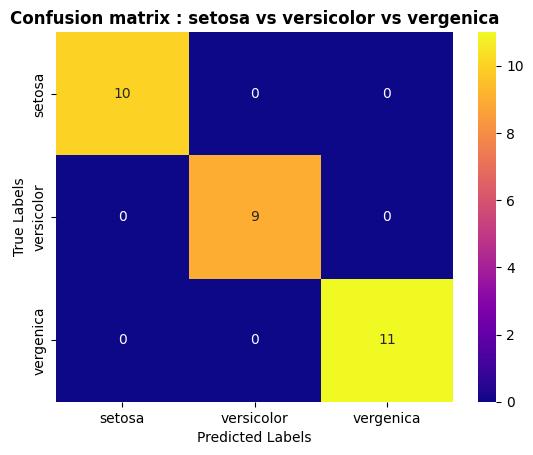

In [20]:
# now plotting simple confusion matrix

from sklearn.metrics import confusion_matrix

conf_m = confusion_matrix(y_test, y_pred)


sns.heatmap(
    data = conf_m,
    cmap="plasma",
    annot = True,
    xticklabels = ["setosa", "versicolor", "vergenica"],
    yticklabels = ["setosa", "versicolor", "vergenica"],
    
)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion matrix : setosa vs versicolor vs vergenica", fontweight = "bold")
plt.show()

# **9️⃣ Decision Boundary**

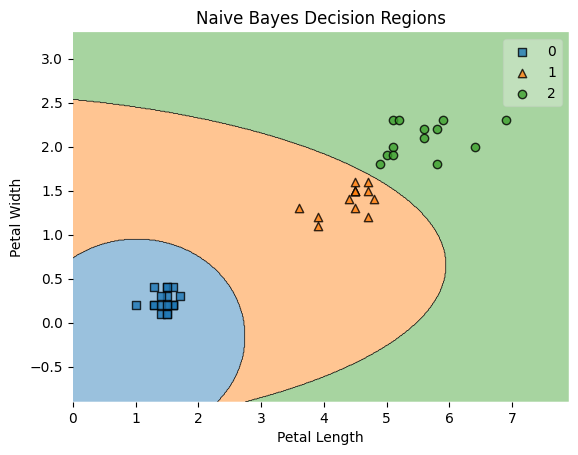

Score : 1.0


In [21]:
# now plotting boundary of classification
from mlxtend.plotting import plot_decision_regions

# we have to use only features so that we can plot a 2d graph
X = x[:,2:]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


gnb = GaussianNB()
gnb.fit(X_train, y_train)



plot_decision_regions(X=X_test, y=y_test, clf=gnb)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Naive Bayes Decision Regions")
plt.show()

print(f"Score : {gnb.score(X_test, y_test)}")

# 🔟 Evaluation Metrics

**Common metrics used:**

✅ Accuracy<br>

✅ Precision<br>

✅ Recall<br>

✅ F1-score<br>

✅ Confusion Matrix

# 🗺️ **Real-World Applications**

**📧 Email Spam Filtering**<br>
**📱 Sentiment Analysis (Positive/Negative)**<br>
**💊 Medical Diagnosis**<br>
**💬 Document Classification (News, Articles)**<br>
**📚 Language Detection**<br>
**👨‍💼 Customer Segmentation**

# **🌈 Example: Multinomial Naïve Bayes for Text Classification**

**example for spam detection:**

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

## **Dataset Overview: spam.csv**

### **Context**
> #### The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

### **Content**
> #### The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.

In [23]:
df = pd.read_csv("spam.csv", encoding = 'latin-1')


#### 🌟 NOTE: ***“This file is actually in latin-1 encoding — so we have to read it that way.”***

| Feature             | UTF-8                             | Latin-1                             |
| ------------------- | --------------------------------- | ----------------------------------- |
| Character support   | Universal (all languages, emojis) | Only Western European               |
| Bytes per character | 1–4 (variable)                    | Always 1                            |
| Default in pandas   | ✅ Yes                             | ❌ No                                |
| When to use         | Almost always (modern files)      | When UTF-8 fails to decode old data |


In [24]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [25]:
df = df.iloc[:,0:2]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [27]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [28]:
# converting text to (features)

vectorizer = CountVectorizer()
x = vectorizer.fit_transform(df["v2"])
x

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 73916 stored elements and shape (5572, 8672)>

In [29]:
labels = df["v1"].map({"ham": 0, "spam": 1}) #encoding labels

In [30]:
# splitting data

x_train , x_test, y_train, y_test = train_test_split(x, labels, test_size = 0.2, random_state = 42)

In [31]:
# train model
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [32]:
# score
model.score(x_test, y_test)

0.97847533632287

In [33]:
# predicting
y_pred = model.predict(x_test)

In [34]:
#Evaluate 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.91      0.93      0.92       150

    accuracy                           0.98      1115
   macro avg       0.95      0.96      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
conf_m = confusion_matrix(y_test ,y_pred)

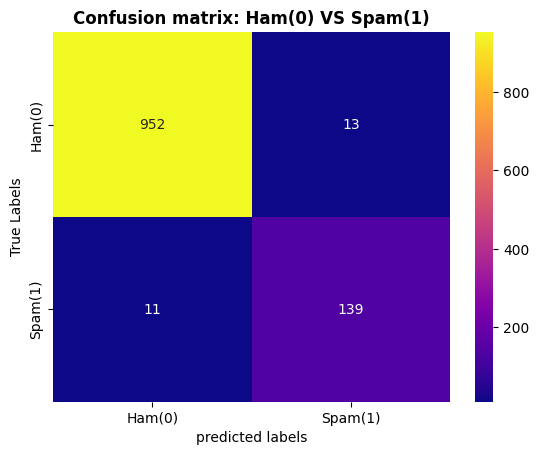

In [37]:
sns.heatmap(
    data = conf_m, 
    annot = True,
    cmap = "plasma",
    xticklabels = ["Ham(0)", "Spam(1)"],
    yticklabels = ["Ham(0)", "Spam(1)"],
    fmt = ".6g"
    
)
plt.title("Confusion matrix: Ham(0) VS Spam(1)",fontweight = 'bold')
plt.xlabel("predicted labels")
plt.ylabel("True Labels")
plt.show()

## **Increasing recall for ham**

In [ ]:
y_prob = model.predict_proba(x) #taking entire text feature

# using a custom threshold
threshold = 0.999

y_pred_custom  = (y_prob[:,1] >= threshold).astype(int)
# (y_prob[:, 1]) this select the probabilities for the class 1
# (y_prob[:,1] >= threshold) returns a one dimension numpy boolena arrays contain values True or False
# astype(int) convert those values into integer True->1 and False -> 0 and returns a one dimensional numpy array of binary data

print(classification_report(labels ,y_pred_custom, target_names=["ham", 'spam']))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.90      0.94       747

    accuracy                           0.99      5572
   macro avg       0.99      0.95      0.97      5572
weighted avg       0.99      0.99      0.99      5572



In [39]:
conf_m = confusion_matrix(labels, y_pred_custom) #passing entire labels as y_true

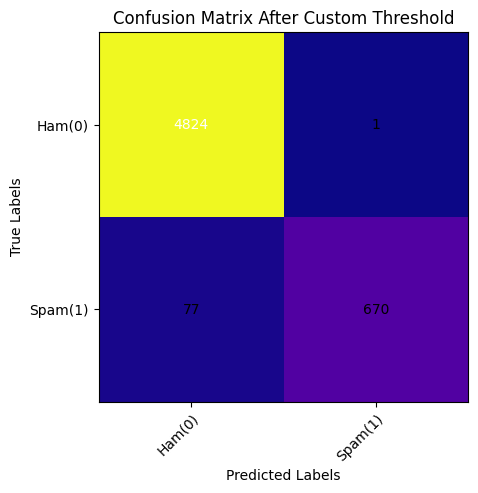

In [40]:
from mlxtend.plotting import plot_confusion_matrix

plot_confusion_matrix(
    conf_mat=conf_m,
    cmap = "plasma",
    class_names = ["Ham(0)", "Spam(1)"]
    
)

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix After Custom Threshold")
plt.show()

## **Precision-Recall Curve**

In [41]:
from sklearn.metrics import precision_recall_curve

import matplotlib.pyplot as plt

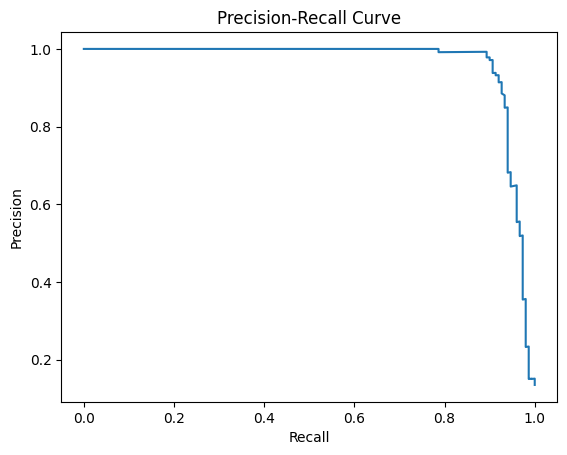

In [42]:
y_prob = model.predict_proba(x_test)[:,1]

prec, rec, thresh  = precision_recall_curve(y_test, y_prob)

plt.plot(rec, prec)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()